In [1]:
using Pkg
Pkg.add("CSV")
using CSV, Plots
theme(:dark)
iris = CSV.read("iris_data.csv")
iris = iris[1:150,1:5]

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [======>                                  ]  13.2 %                            ]  29.9 % [===================>                     ]  46.8 %Fetching: [========================>                ]  59.9 %>         ]  76.6 %Fetching: [======================================>  ]  93.2 % Resolving package versions...
 Installed IntervalSets ── v0.5.0
 Installed ImageMetadata ─ v0.9.1
 Installed Tables ──────── v1.0.4
 Installed BinDeps ─────── v1.0.1
 Installed HTTP ────────── v0.8.14
 Installed AxisArrays ──── v0.4.0
 Installed ImageCore ───── v0.8.14
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [39de3d68] ↓ AxisArrays v0.4.2 ⇒ v0.4.0
  [9e28174c] ↑ BinDeps v1.0.0 ⇒ v1.0.1
  [cd3eb016] ↑ HTTP v0.8.13 ⇒ v0.8.14
  [a09fc81

┌ Info: Recompiling stale cache file /Users/randydavila/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1190


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [2]:
data1 = [[x[1],x[2],1.0, x[3] == "setosa" ? 1.0 : 0.0]
        for x in zip(iris[1:150,1], iris[1:150,3], iris[1:150,5])]

data2 = [[x[1],x[2],1.0,x[3] == "versicolor" ? 1.0 : 0.0]
        for x in zip(iris[1:150,1], iris[1:150,3], iris[1:150,5])]

data3 = [[x[1],x[2],1.0,x[3] == "virginica" ? 1.0 : 0.0]
        for x in zip(iris[1:150,1], iris[1:150,3], iris[1:150,5])]


σ(z) = 1.0/(1.0+exp(-z))

function L(weights, data)
    return (-1.0/size(data)[1])*sum([x[4]*log(σ(weights'*x[1:3]))+(1.0-x[4])*log(1.0-σ(weights'*x[1:3]))
                                for x in data])
end

function ∇L(weights,data)
    w1 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[1] for x in data])
    w2 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[2] for x in data])
    w3 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[3] for x in data])
    return [w1, w2, w3]
end

function gradient_descent(data, α, ϵ)
    i = 1.0
    weights = rand(3)
    error_points = [(i, L(weights, data))]
    while L(weights, data) > ϵ && i < 100.0
        weights -= α.*∇L(weights, data)
        i += 1.0
        push!(error_points, (i, L(weights, data)))
    end
    return weights, error_points
end

function predict(W, x)
    if σ(W'*x[1:3]) >.50
        return 1
    else
        return 0
    end
end

function train(x)
    W1, P1 = gradient_descent(data1, 1.0, 0.00001)
    W2, P2 = gradient_descent(data2, 1.0, 0.00001)
    W3, P3 = gradient_descent(data3, 1.0, 0.00001)
    return W1, W2, W3
end

function predict_multi(x)
    W1, W2, W3 = train(x)
    return argmax([predict(W1, x), predict(W2, x), predict(W3, x)])
end

predict_multi (generic function with 1 method)

In [3]:
W1, P1 = gradient_descent(data1, 1.0, 0.00001)
W2, P2 = gradient_descent(data2, 1.0, 0.00001)
W3, P3 = gradient_descent(data3, 1.0, 0.00001)

([-6.25632, 11.1763, -2.24879], Tuple{Float64,Float64}[(1.0, 4.45636), (2.0, 8.42088), (3.0, 0.41987), (4.0, 1.77224), (5.0, 8.00616), (6.0, 0.327127), (7.0, 0.859819), (8.0, 7.32162), (9.0, 5.26134), (10.0, 2.17324)  …  (91.0, 1.4289), (92.0, 2.95504), (93.0, 0.877219), (94.0, 2.27255), (95.0, 1.40818), (96.0, 2.85468), (97.0, 0.89465), (98.0, 2.19786), (99.0, 1.38494), (100.0, 2.75154)])

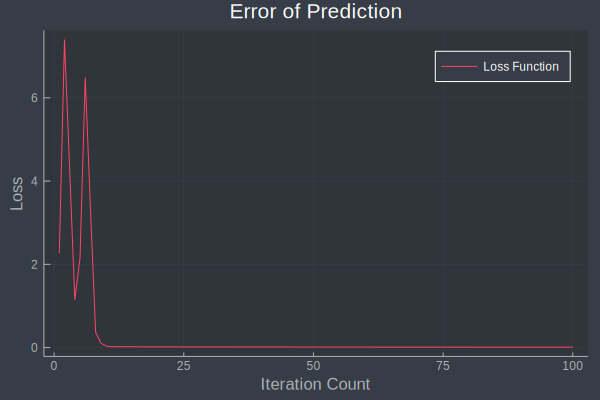

In [7]:
plot(P1, 
    label = "Loss Function",
    xaxis = "Iteration Count",
    yaxis = "Loss",
    title = "Error of Prediction")

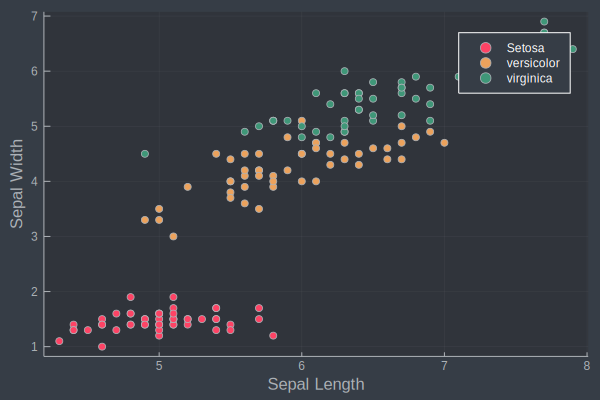

In [9]:
scatter([(x[1], x[2]) for x in data1 if x[4] == 1.0], 
        label = "Setosa", 
        xaxis = "Sepal Length",
        yaxis = "Sepal Width")
scatter!([(x[1], x[2]) for x in data2 if x[4] == 1.0], label = "versicolor")
scatter!([(x[1], x[2]) for x in data3 if x[4] == 1.0], label = "virginica")

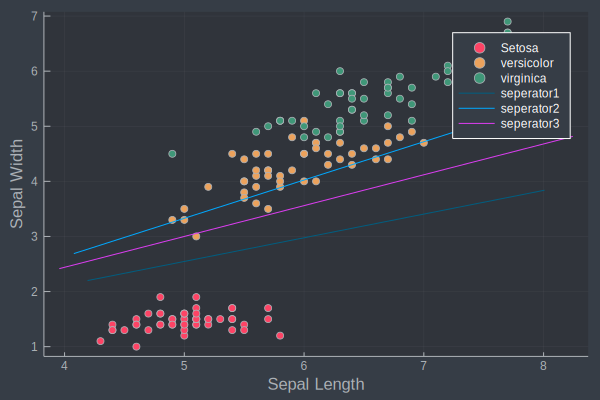

In [10]:
plot!(x-> -(W1[1]/W1[2])*x - (W1[3]/W1[2]), label = "seperator1")

plot!(x-> -(W2[1]/W2[2])*x - (W2[3]/W2[2]), label = "seperator2")

plot!(x-> -(W3[1]/W3[2])*x - (W3[3]/W3[2]), label = "seperator3")

In [50]:
data2

150-element Array{Array{Float64,1},1}:
 [5.1, 1.4, 1.0, 0.0]
 [4.9, 1.4, 1.0, 0.0]
 [4.7, 1.3, 1.0, 0.0]
 [4.6, 1.5, 1.0, 0.0]
 [5.0, 1.4, 1.0, 0.0]
 [5.4, 1.7, 1.0, 0.0]
 [4.6, 1.4, 1.0, 0.0]
 [5.0, 1.5, 1.0, 0.0]
 [4.4, 1.4, 1.0, 0.0]
 [4.9, 1.5, 1.0, 0.0]
 [5.4, 1.5, 1.0, 0.0]
 [4.8, 1.6, 1.0, 0.0]
 [4.8, 1.4, 1.0, 0.0]
 ⋮                   
 [6.0, 4.8, 1.0, 1.0]
 [6.9, 5.4, 1.0, 1.0]
 [6.7, 5.6, 1.0, 1.0]
 [6.9, 5.1, 1.0, 1.0]
 [5.8, 5.1, 1.0, 1.0]
 [6.8, 5.9, 1.0, 1.0]
 [6.7, 5.7, 1.0, 1.0]
 [6.7, 5.2, 1.0, 1.0]
 [6.3, 5.0, 1.0, 1.0]
 [6.5, 5.2, 1.0, 1.0]
 [6.2, 5.4, 1.0, 1.0]
 [5.9, 5.1, 1.0, 1.0]